# Grover's Database Search Algorithm

## Introduction

Grover's algorithm is a quantum algorithm that discovers the unique input to an oracle (black box) function that produces a known output value, using just $O({\sqrt {N}})$ evaluations of the function, where $N$ is the size of the function's domain. This algorithm was devised by Lov Grover in 1996, an Indian-American computer scientist.

The analogous search problem in classical computation cannot be solved in fewer than $O(N)$ evaluations. At roughly the same time that Grover published his algorithm, Bennett, Bernstein, Brassard, and Vazirani proved that any quantum solution to the problem needs to evaluate the function $\Omega ({\sqrt {N}})$ times, so Grover's algorithm is asymptotically optimal.

Unlike other quantum algorithms, which may provide exponential speedup over their classical counterparts (Shor's Factoring Algorithm), Grover's algorithm provides only a quadratic speedup. However, even quadratic speedup is considerable when $N$ is large. Grover's algorithm could brute-force a $128$-bit symmetric cryptographic key in roughly $264$ iterations, or a $256$-bit key in roughly $2128$ iterations. As a result, it is sometimes suggested that symmetric key lengths be doubled to protect against future quantum attacks.

To start with, let us consider the quantum oracle.
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$

## The Oracle

Given a search space of $N$ elements, we use the index of an element as the primary search key. This is a number in the range $0$ to $N − 1$. 

For convenience we make the following assumptions:
1. $N = 2^n$, enabling the index to be stored in $n$ bits.
2. The search problem has exactly $M$ solutions, with $1 ≤ M ≤ N$. 

We can represent a particular instance of the search problem by a function $f$, taking as input an integer $x \in \{0, 1, ..., N - 1\}$ such that 
\begin{equation}
    f(x) = 
        \begin{cases}
            1 & \text{$x$ is a solution to the search problem}\\
            0 & \text{otherwise}
        \end{cases}
\end{equation}

Suppose a quantum oracle (black box) with the ability to "recognize" solutions to the search problem is available. An oracle qubit $q$ is used to signal this recognition and the oracle is modelled as an unitary operator **$\textit{O}$** which operates as:

$$ \ket{x}\ket{q} \xrightarrow{\textit{O}} \ket{x}\ket{q \oplus f(x)} $$

where 
* $\ket{x}$ : index register
* $\oplus$  : addition modulo 2
* $\ket{q}$ : oracle qubit (value is flipped if $f(x) = 1$, otherwise unchanged)

It can be verified that $x$ is a solution to the search problem by preparing $\ket{x}\ket{0}$, applying the oracle, and checking to see if the oracle qubit has been flipped to $\ket{1}$.

It is useful to prepare the oracle qubit in the state $\ket{-} = \frac{\ket{0} - \ket{1}}{\sqrt{2}}$. If $x$ is not a solution to the search problem, applying the oracle to the state $\ket{x}\ket{-}$ does not change the state. Otherwise if $x$ is a solution, then the final state is $-\ket{x}\ket{-}$. Thus the oracle exihibits the following effect:

$$\ket{x}\ket{-} \xrightarrow{\textit{O}} (-1)^{f(x)}\ket{x}\ket{-}$$

To simplify our description, we can omit the oracle qubit $\ket{-}$ since it remains unchanged. The action of the oracle is henceforth written as:

$$\ket{x} \xrightarrow{\textit{O}} (-1)^{f(x)}\ket{x}$$

The oracle thus $\textit{marks the solutions}$ of the search problem by $\textit{inverting their phase}$. It turns out that for an $N$ item search problem with $M$ solutions, we need only apply the search oracle *$O(\sqrt{N/M})$* times to obtain a solution on a quantum computer.

## Procedure

The search algorithm operates as shown in the diagram below.
<img src="schematicCirc.png" alt="Schematic circuit for the quantum search algorithm" title="Schematic circuit for the quantum search algorithm" />

The algorithm requires a single $n$ qubit register. Since the internal workings of the oracle along with the extra work qubits needed by it are not necessary for describing the search algorithm, we omit the details here.

Firstly, the algorithm initializes the circuit to a state $\ket{0}^{\otimes n}$ and a Hadamard traansform converts this state to an equal superposition state:

$$\ket{\psi} = \frac{1}{N^{1/2}} \sum_{x=0}^{N-1} \ket{x}$$

The algorithm then repeatedly applies a quantum subroutine, know as the **Grover iteration** or **Grover operator**, denoted by *G*. The quantum circuit for Grover iteration is as follows: 

![Circuit for the Grover iteration G](GroverIteration.PNG)

The four steps below illustrate the operation of the operation of the above circuit:
1. Apply the oracle *O*.
2. Apply the Hadamard transform $H^{\otimes n}$.
3. Perform a conditional phase shift, with every computational basis state except $\ket{0}$ receiving a phase shift of −1, $\ket{x} \rightarrow −(−1)^{\delta x0} \ket{x}$.
4. Apply the Hadamard transform $H^{\otimes n}$.

Each of the operation in the Grover iteration can be efficiently implemented on a quantum computer. Steps $2$ and $4$, require $n = log_2(N)$ operations each while Step $3$, may be implemented using $O(n)$ gates. The cost of the oracle call depends upon
the specific application, but for now, we note that the Grover iteration requires only a single oracle call. 

The combined effect of steps $2$, $3$, and $4$ reduces the initial state to:
$$H^{\otimes n}(2\ket{0}\bra{0} − I)H^{\otimes n} = 2\ket{\psi}\bra{\psi} − I$$
where $\ket{\psi}$ is defined as above. 

Thus the Grover iteration, *G*, may be written as $$G = (2\ket{\psi}\bra{\psi} − I)O$$

*G* can be regarded as a rotation in the two-dimensional space spanned by the starting vector $\ket{\psi}$ and the state consisting of a uniform superposition of solutions to the search problem. This improves the probability amplitude of the state associated with the solution of the search algorithm. The upper bound on the number of iterations required for this purpose:
$$ R \leq \left \lceil \frac{\pi}{4} \sqrt{\frac{N}{M}} \right \rceil $$

Thus $R = O(\sqrt{N/M})$ Grover iterations (equivalently oracle calls) must be performed to obtain a solution to the search problem with high probability, which is a quadratic improvement over the $O(N/M)$ oracle calls required classically. 

The quantum search algorithm is summarized below, for the case $M = 1$.

## Algorithm

![algorithm](algo.png)

![High-level depiction of Grover’s quantum search algorithm](CircForGrover.png)

## Quantum Search on an Unstructured Database

Suppose we have a database containing $N ≡ 2^n$ items, each of length $l$ bits labelled as $d_1, ..., d_N$. To determine where a particular $l$ bit string, $s$, is in the database, the organisation of the required quantum computer is as follows.

The quantum computer consists of two units (for simplicity), a CPU and a memory. Assuming that the CPU contains four registers:
1. an $n$ qubit **index** register initialized to $\ket{0}$
2. an $l$ qubit register initialized to $\ket{s}$ and the register remains in the same state for the entire computation
3. an $l$ qubit **data** register initialized to $\ket{0}$
4. a $1$ qubit register initialized to $\ket{-}$

The memory unit can be implemented in one of two following ways. 
1. A quantum memory containing $N = 2^n$ cells of $l$ qubits each, containing the database entries $\ket{d_x}$.
2. A classical memory containing $N = 2^n$ cells of $l$ bits each, containing the database entries $d_x$. 

But unlike the traditional classical memory, the second implementation can be used to address a quantum index $x$ which can be in a superposition of multiple values allowing a superposition of cell values to be loaded from memory. 

Memory access works in the following way: if the CPU’s index register is in the state $\ket{x}$ and the data register is in the state $\ket{d}$, then the contents $d_x$ of the $x^{th}$ memory cell are added to the data register: $\ket{d} \rightarrow \ket{d \oplus d_x}$, where the addition is done bitwise, modulo $2$. 

The key part of implementing the quantum search algorithm lies in the implementation of the oracle, which must flip the phase of the index which locates $s$ in the memory. Suppose the CPU is in the state $\ket{x}\ket{s}\ket{0}\ket{-}$, applying the *LOAD* operation transforms this state to $\ket{x}\ket{s}\ket{d_x}\ket{-}$. Then, the second and third registers are compared, and if they are the same, then a bit flip is applied to register $4$, otherwise nothing is changed. The effect of this operation is

\begin{equation}
    \ket{x}\ket{s}\ket{d_x}\ket{-} \rightarrow 
        \begin{cases}
            -\ket{x}\ket{s}\ket{d_x}\ket{-} & \text{$d_x = s$}\\
            \ket{x}\ket{s}\ket{d_x}\ket{-} & \text{$d_x \neq s$}
        \end{cases}
\end{equation}

The data register is then restored to the state $\ket{0}$ by performing the *LOAD* operation again. The total action of the oracle thus leaves registers $2$, $3$ and $4$ unaffected, and unentangled with register $1$. 

Using this oracle's implementation we can apply the quantum search algorithm to determine the location of $s$ in the database, using $O(\sqrt{N})$ *LOAD* operations, compared to the $N$ *LOAD* operations that were required classically.

![5-qubit addressing](quantumAddressing.PNG)

In order for the oracle to function correctly on superpositions it may seem as though the memory needs to be quantum mechanical. But with some caveats, the memory can actually be implemented classically, making it much more resistant to the effects of noise. Here, a quantum addressing scheme is needed. The picture below depicts a conceptual diagram of a $32$ cell classical memory with a $5$ qubit quantum addressing scheme. Each circle represents a switch which addresses the qubit inscribed within it. For example, when $\ket{x_4} = \ket{0}$, the corresponding switch routes the input qubit towards the left and when $\ket{x_4} = \ket{1}$ the switch routes the input qubit to the right. If $\ket{x_4} = (\ket{0} + \ket{1})/\sqrt{2}$, then an equal superposition of both routes is taken. The data register qubits enter at the top of the tree, and are routed down to the database, which changes their state according to the
contents of the memory. The qubits are then routed back into a definite position, leaving them with the retrieved
information. Physically, this could be realized using, for example, single photons for the data register qubits, which
are steered using nonlinear interferometers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import hashlib
import string
from math import sqrt, pi
from collections import OrderedDict
from statistics import mean
from random import shuffle

In [2]:
def oracle(x):
    return hashlib.sha256(bytes(x, 'utf-8')).hexdigest()

In [3]:
def plotGraph(amplitude, n):
    y_pos = np.arange(n)
    plt.bar(y_pos, amplitude.values(), align='center', color='m')
    keys = list(amplitude.keys())
    keys = [obj[1] for obj in keys]
    plt.xticks(y_pos, keys)
    plt.ylabel('Amplitude')
    plt.title('Grover\'s Search')
    plt.show()

In [4]:
def grover(key, data, *t):
    n = len(data)
    rounds = int((pi / 4) * sqrt(n))
    def _grover(target, objects, n, rounds):
        # initialization
        y_pos = np.arange(n)
        tuples = [(i, objects[i]) for i in range(n)]
        amp = OrderedDict.fromkeys(tuples, 1/sqrt(n))
        
        if t:
            print("Rounds required: {}".format(rounds))
            plotGraph(amp,n)
        for i in range(0, rounds):
            # phase inversion
            for k, v in list(amp.items()):
                if oracle(k[1]) == target:
                    amp[k] = v * -1

            # inversion abt mean
            avg = mean(amp.values())
            for k, v in list(amp.items()):
                if oracle(k[1]) == target:
                    amp[k] = (2 * avg) + abs(v)
                    continue
                amp[k] = v-(2*(v-avg))
                
            if t:
                #print("Rounds required: {}".format(rounds))
                plotGraph(amp,n)
        return amp
    
    amp = _grover(key, data, n, rounds)
    return amp, max(amp, key=amp.get)

In [5]:
def shuffle_word(word):
    word = list(word)
    shuffle(word)
    return ''.join(word)

jrgzlahyxptnkcombfeusqivwd
Rounds required: 4


TypeError: unsupported operand type(s) for +: 'int' and 'odict_values'

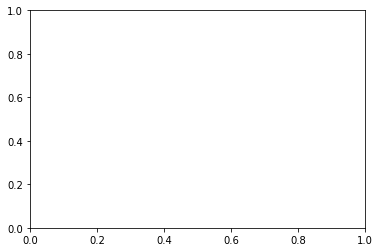

In [7]:
needle = oracle("f")
haystack = shuffle_word(string.ascii_lowercase)
print(haystack)
amp, idx = grover(needle, haystack, 1)
#plotGraph(amp, len(haystack))
print(idx)

# Experimentation

The experimentation is done on the Human-Resource(HR) dataset. The HR data is imported as .csv file.
Different files in the data have different intensions. The intension number for the 'core_dataset' is 21. Of all these intension columns, a unique column(KEY) can be selected for searching in the database. For example, 'Employee Number' can be used as the search key. Grover's search algorithm's benefit can be easily found on unordered data and hence, the dataset used is unordered unlike the B and B+ tree ordering of the data in most of the databases. 


Import the data

In [91]:
import pandas
df = pandas.read_csv('500000-Records/500000 Records.csv')
import numpy as np
#print(df)
data = np.array(df)
print(data)

[[857211 'Ms.' 'Hermila' ... 'South' 'hjsuhr' 'oZ%{<6wN!A']
 [514341 'Mr.' 'Antonio' ... 'South' 'aqjoy' '7_[%FE;saZ:B']
 [314598 'Prof.' 'Sebastian' ... 'Northeast' 'sjmoores' 'Z0:_dR*OQhQlF']
 ...
 [192620 'Mrs.' 'Jestine' ... 'Midwest' 'jtsugg' 'M#p8|HJ$.']
 [249486 'Mr.' 'Johnson' ... 'West' 'jnmclelland' 'kq8o$uQl/PJ@']
 [829485 'Dr.' 'Rob' ... 'Northeast' 'rtswoope' 'lE/^}Clt']]


'Find' is a linear search algorithm. It takes O(N) time for finding records in the database.
It returns -1 if the data queried is not present in the database

In [63]:
def find(attr,l):
    for idx,i in enumerate(data[0:l]):
        if (i[35] == attr):
            return idx
    return -1

In [120]:
times_1 = []
times1 = []
l = [i for i in range(20,5000)]
import time
for k in l:
    t = random.sample(range(1, k), 10)
    for i in t:
        start = time.clock() 
        find(data[i][35],k)
        times1.append((time.clock() - start)*1000)
    times_1.append(np.average(times1))
#print(times_1)

In [122]:
times_2 = []
times2 = []
l = [i for i in range(20,5000)]
import time
for k in l:
    t = random.sample(range(1, k), 10)
    for i in t:
        needle = oracle(data[i][35]) 
        start = time.clock() 
        amp, idx = grover(needle, data[0:k,35])
        times2.append((time.clock() - start)*1000)
    times_2.append(np.average(times2)/k)

Python interaction with MySQL database!

In [1]:
import MySQLdb as mdb
import MySQLdb.cursors

# Database Settings
DB_ONE = {  'HOST': 'localhost',
            'USER': "root",
            'PASS': "venu2",
            'DB': "9000660866"}

# General Functions

def connect_to_db(DB_SETTINGS):
    """
    Connect to a database
    Returns a connection object
    """
    DBS = DB_SETTINGS
    con = mdb.connect(user=DBS['USER'], passwd=DBS['PASS'], host=DBS['HOST'], 
                    db=DBS['DB'], cursorclass=MySQLdb.cursors.DictCursor,
                    charset = "utf8", use_unicode = True)
    return con

def run_query(query, con):
    '''
    Execute a query
    Returns a results set
    '''
    cur = con.cursor()
    cur.execute(query)
    result_set = cur.fetchall()
    return result_set

def print_result(result):
    '''
    Prints the result in human readable format
    '''
    for row in result:
        print(row)

def close(con):
    '''
    Close a db connection
    '''
    con.close()

con=connect_to_db(DB_ONE)
user=raw_input("Enter the username: ")
print (user)
query="select * from user where username="+user+";".format(user)
print (query)
result=run_query(query,con)
print_result(result)


close(con)

ModuleNotFoundError: No module named 'MySQLdb'

In [11]:


needle = oracle("Onque, Jasmine")
#haystack = shuffle_word(string.ascii_lowercase)
#print(haystack)
import time
start = time.clock()  
amp, idx = grover(needle, data)
print((time.clock() - start)*1000/data.shape[0])
print(idx[0])
#plotGraph(amp, len(haystack))

Rounds required: 13
0.01648675496688764
279
